<a href="https://colab.research.google.com/github/vishalkumarlondon/fashion-week/blob/master/data_collection_and_cleaning_uberh3_0516.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://storage.googleapis.com/public-data-data_viz-2/fashionweeks-2019-instagram-geospatial-clean.csv

--2020-05-16 17:15:27--  https://storage.googleapis.com/public-data-data_viz-2/fashionweeks-2019-instagram-geospatial-clean.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3254549 (3.1M) [text/csv]
Saving to: ‘fashionweeks-2019-instagram-geospatial-clean.csv.1’

fashionweeks-2019-i 100%[===================>]   3.10M  --.-KB/s    in 0.01s   

2020-05-16 17:15:27 (235 MB/s) - ‘fashionweeks-2019-instagram-geospatial-clean.csv.1’ saved [3254549/3254549]



In [0]:
import pandas as pd

fashion_weeks_19 = pd.read_csv('fashionweeks-2019-instagram-geospatial-clean.csv')
print(fashion_weeks_19.shape)

(22752, 16)


In [0]:
#show the fashion week 2019 dataframe
fashion_weeks_19.head()

,date,time,year,month,day,hour,minute,second,from_user,filename,compound_sentiment,city_name,zipcode,streetaddress,latitude,longitude
0,2019-09-16,2019-09-16 13:39:38,2019,9,16,13,39,38,3074052310,nyfw2019,0.0000,"New York, New York",11201,60 Furman St,40.702285,-73.995583
1,2019-01-06,2019-01-06 18:12:42,2019,1,6,18,12,42,4351091948,nyfw2019,0.2732,"New York, New York",10001,401 7th 33rd St,40.749904,-73.991040
2,2019-09-05,2019-09-05 15:40:45,2019,9,5,15,40,45,1389389979,nyfw2019,0.0000,"New York, New York",10013,Spring Studios,40.720873,-74.006004
3,2019-12-31,2019-12-31 12:56:12,2019,12,31,12,56,12,11041582436,nyfw2019,0.0000,"New York, New York",10013,Spring Studios,40.720873,-74.006004
4,2019-12-31,2019-12-31 03:37:39,2019,12,31,3,37,39,13338516028,nyfw2019,0.0000,"New York, New York",10013,6 St Johns Lane,40.720839,-74.005973


In [0]:
#show the number of posts per city
fashion_weeks_19.filename.value_counts()

nyfw2019    18918
pfw2019      2052
lfw2019      1782
Name: filename, dtype: int64

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
#airbnb data
!wget https://storage.googleapis.com/public-data-data_viz-2/london-listings-master-2019.csv
!wget https://storage.googleapis.com/public-data-data_viz-2/newyork-listings-master-2019.csv
!wget https://storage.googleapis.com/public-data-data_viz-2/paris-listings-master-2019.csv

--2020-05-16 17:15:31--  https://storage.googleapis.com/public-data-data_viz-2/london-listings-master-2019.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83455795 (80M) [text/csv]
Saving to: ‘london-listings-master-2019.csv.1’

london-listings-mas 100%[===================>]  79.59M   163MB/s    in 0.5s    

2020-05-16 17:15:31 (163 MB/s) - ‘london-listings-master-2019.csv.1’ saved [83455795/83455795]

--2020-05-16 17:15:33--  https://storage.googleapis.com/public-data-data_viz-2/newyork-listings-master-2019.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 2607:f8b0:400c:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79185159 (76M) [text

In [0]:
london_airbnb = pd.read_csv('london-listings-master-2019.csv')
newyork_airbnb = pd.read_csv('newyork-listings-master-2019.csv')
paris_airbnb = pd.read_csv('paris-listings-master-2019.csv')

In [0]:
print(london_airbnb.shape, newyork_airbnb.shape, paris_airbnb.shape)

(840212, 16) (592519, 16) (744575, 16)


In [0]:
london_airbnb['price_float'] = london_airbnb['price'].str.replace(',', '').astype(float)
newyork_airbnb['price_float'] = newyork_airbnb['price'].str.replace(',', '').astype(float)
paris_airbnb['price_float'] = paris_airbnb['price'].str.replace(',', '').astype(float)

In [0]:
mean_london = london_airbnb['price_float'].mean()
mean_newyork = newyork_airbnb['price_float'].mean()
mean_paris = paris_airbnb['price_float'].mean()

In [0]:
std_london  = london_airbnb['price_float'].std()
std_newyork  = newyork_airbnb['price_float'].std()
std_paris  = paris_airbnb['price_float'].std()

In [0]:
lower_limit_london = mean_london - (2*std_london)
lower_limit_newyork = mean_newyork - (2*std_newyork)
lower_limit_paris = mean_paris - (2*std_paris)
upper_limit_london = mean_london + (2*std_london)
upper_limit_newyork = mean_newyork + (2*std_newyork)
upper_limit_paris = mean_paris + (2*std_paris)

print('lower_limit_london', lower_limit_london )
print('lower_limit_newyork', lower_limit_newyork )
print('lower_limit_paris', lower_limit_paris )
print('upper_limit_london', upper_limit_london )
print('upper_limit_newyork', upper_limit_newyork )
print('upper_limit_paris', upper_limit_paris )


lower_limit_london -384.8003853310408
lower_limit_newyork -358.3646696212147
lower_limit_paris -280.99944959603187
upper_limit_london 627.1718364820736
upper_limit_newyork 664.2124252633326
upper_limit_paris 515.6102759063431


In [0]:
london_airbnb_1 = london_airbnb[london_airbnb['price_float']<=upper_limit_london ]
london_airbnb_noOutlier = london_airbnb_1[london_airbnb_1['price_float']>=lower_limit_london]

newyork_airbnb_1 = newyork_airbnb[newyork_airbnb['price_float']<=upper_limit_newyork ]
newyork_airbnb_noOutlier = newyork_airbnb_1[newyork_airbnb_1['price_float']>=lower_limit_newyork]

paris_airbnb_1 = paris_airbnb[paris_airbnb['price_float']<=upper_limit_paris]
paris_airbnb_noOutlier = paris_airbnb_1[paris_airbnb_1['price_float']>=lower_limit_paris]


In [0]:
london_airbnb_noOutlier.dropna()
newyork_airbnb_noOutlier.dropna()
paris_airbnb_noOutlier.dropna()


,Unnamed: 0,id,host_id,last_scraped,zipcode,latitude,longitude,neighbourhood,property_type,room_type,price,number_of_reviews,last_review,year_scraped,month_scraped,day_scraped,price_float
0,0,2577,2827,2019-03-12,75010,48.86993,2.36251,République,Loft,Entire home/apt,125.00,1,2019-01-02,2019,3,12,125.0
1,1,3109,3631,2019-03-12,75014,48.83349,2.31852,Alésia,Apartment,Entire home/apt,75.00,8,2018-12-19,2019,3,12,75.0
2,2,5396,7903,2019-03-12,75004,48.85100,2.35869,IV Arrondissement,Apartment,Entire home/apt,115.00,162,2019-02-23,2019,3,12,115.0
3,3,7397,2626,2019-03-12,75004,48.85758,2.35275,IV Arrondissement,Apartment,Entire home/apt,115.00,238,2019-03-04,2019,3,12,115.0
4,4,8522,25435,2019-03-12,75020,48.86528,2.39326,Père Lachaise - Ménilmontant,Apartment,Entire home/apt,90.00,1,2010-06-16,2019,3,12,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744483,810405,38618541,2678973,2019-09-18,75019,48.87781,2.37467,XIX Arrondissement,Apartment,Entire home/apt,55.00,1,2019-09-14,2019,9,18,55.0
744493,810415,38632664,2817606,2019-09-18,75010,48.87042,2.34897,Opéra - Grands Boulevards,Apartment,Entire home/apt,110.00,1,2019-09-16,2019,9,18,110.0
744528,810450,38644773,295212908,2019-09-18,92130,48.82693,2.27750,Porte de Versailles,Apartment,Entire home/apt,60.00,1,2019-09-16,2019,9,18,60.0
744539,810461,38657739,19388950,2019-09-18,75011,48.85580,2.37905,XI Arrondissement,Apartment,Entire home/apt,100.00,1,2019-09-17,2019,9,18,100.0


In [0]:
london_airbnb_noOutlier['last_review'] = pd.to_datetime(london_airbnb_noOutlier['last_review'])
newyork_airbnb_noOutlier['last_review'] = pd.to_datetime(newyork_airbnb_noOutlier['last_review'])
paris_airbnb_noOutlier['last_review'] = pd.to_datetime(paris_airbnb_noOutlier['last_review'])


In [0]:
london_airbnb_noOutlier.sort_values('last_review', inplace=True)
newyork_airbnb_noOutlier.sort_values('last_review', inplace=True)
paris_airbnb_noOutlier.sort_values('last_review', inplace=True)


In [0]:
print(london_airbnb_noOutlier.shape, newyork_airbnb_noOutlier.shape, paris_airbnb_noOutlier.shape)

(829635, 17) (584310, 17) (732149, 17)


In [0]:
london_airbnb_noOutlier['date'] = london_airbnb_noOutlier['last_review']
newyork_airbnb_noOutlier['date'] = newyork_airbnb_noOutlier['last_review']
paris_airbnb_noOutlier['date'] = paris_airbnb_noOutlier['last_review']


In [0]:
london_airbnb_noOutlier.set_index("date", inplace=True)
newyork_airbnb_noOutlier.set_index("date", inplace=True)
paris_airbnb_noOutlier.set_index("date", inplace=True)

In [0]:
london_airbnb_2019 = london_airbnb_noOutlier[london_airbnb_noOutlier['last_review']>=pd.datetime(2019,1,1)]
newyork_airbnb_2019 = newyork_airbnb_noOutlier[newyork_airbnb_noOutlier['last_review']>=pd.datetime(2019,1,1)]
paris_airbnb_2019 = paris_airbnb_noOutlier[paris_airbnb_noOutlier['last_review']>=pd.datetime(2019,1,1)]


In [0]:
london_airbnb_2019.dropna()
newyork_airbnb_2019.dropna()
paris_airbnb_2019.dropna()

,Unnamed: 0,id,host_id,last_scraped,zipcode,latitude,longitude,neighbourhood,property_type,room_type,price,number_of_reviews,last_review,year_scraped,month_scraped,day_scraped,price_float
date,,,,,,,,,,,,,,,,,
2019-01-01,436960,3404798,10574661,2019-06-07,75007,48.860560,2.29802,VII Arrondissement,Apartment,Entire home/apt,160.00,19,2019-01-01,2019,6,7,160.0
2019-01-01,44758,25933193,18471946,2019-03-11,75019,48.887750,2.39339,XIX Arrondissement,Apartment,Private room,40.00,3,2019-01-01,2019,3,11,40.0
2019-01-01,408948,21195137,100320164,2019-04-09,75020,48.872760,2.39252,XX Arrondissement,Apartment,Entire home/apt,76.00,34,2019-01-01,2019,4,9,76.0
2019-01-01,521069,17887797,23144978,2019-05-07,75019,48.900510,2.38881,XIX Arrondissement,Townhouse,Entire home/apt,90.00,6,2019-01-01,2019,5,7,90.0
2019-01-01,92260,19231684,75715524,2019-01-14,75018,48.889206,2.33764,Montmartre,Apartment,Entire home/apt,140.00,26,2019-01-01,2019,1,14,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-18,228554,30649781,229534073,2019-12-19,75011,48.866930,2.37106,XI Arrondissement,Apartment,Entire home/apt,60.00,2,2019-12-18,2019,12,19,60.0
2019-12-18,244152,38951158,298278995,2019-12-19,75017,48.887960,2.31648,Batignolles,Apartment,Entire home/apt,91.00,16,2019-12-18,2019,12,19,91.0
2019-12-18,239070,36536579,274682491,2019-12-19,75011,48.864490,2.37739,République,Apartment,Entire home/apt,78.00,3,2019-12-18,2019,12,19,78.0


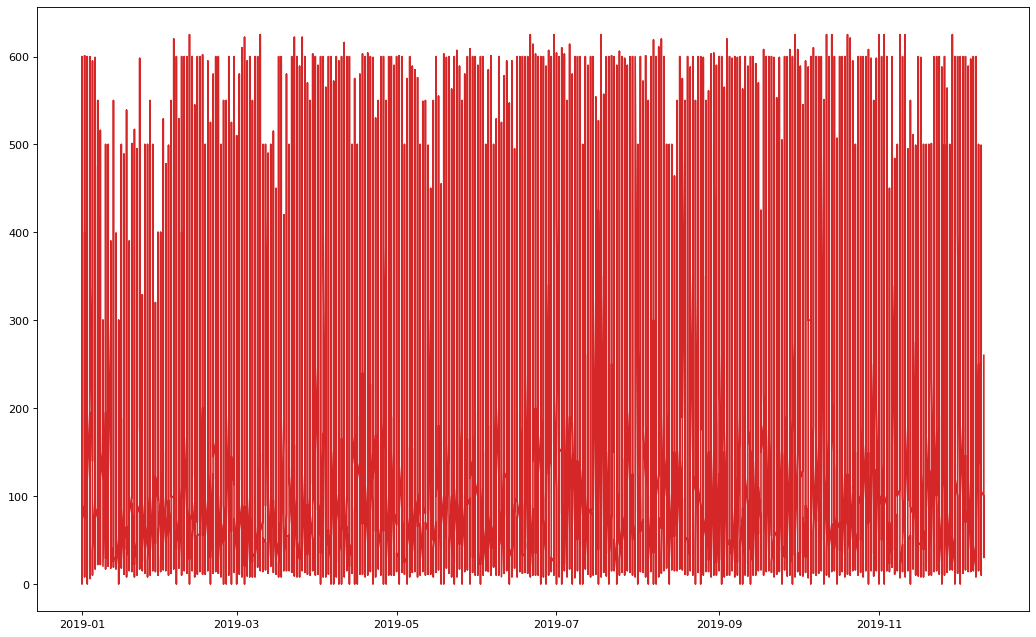

In [0]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('last_review', 'price_float', data=london_airbnb_2019, color='tab:red')

In [0]:
london_airbnb_2019_day= london_airbnb_2019.resample('D').mean()
london_airbnb_2019_day = london_airbnb_2019_day.round(3)
newyork_airbnb_2019_day= newyork_airbnb_2019.resample('D').mean()
newyork_airbnb_2019_day = newyork_airbnb_2019_day.round(3)
paris_airbnb_2019_day= paris_airbnb_2019.resample('D').mean()
paris_airbnb_2019_day = paris_airbnb_2019_day.round(3)

In [0]:
london_airbnb_2019_day['ma10'] = london_airbnb_2019_day['price_float'].rolling(10).mean().shift(-9)
london_airbnb_2019_day['ma20'] = london_airbnb_2019_day['price_float'].rolling(20).mean().shift(-19)


In [0]:
london_airbnb_2019_day['ma10'].to_csv("ma10_London.csv")
london_airbnb_2019_day['ma20'].to_csv("ma20_London.csv")

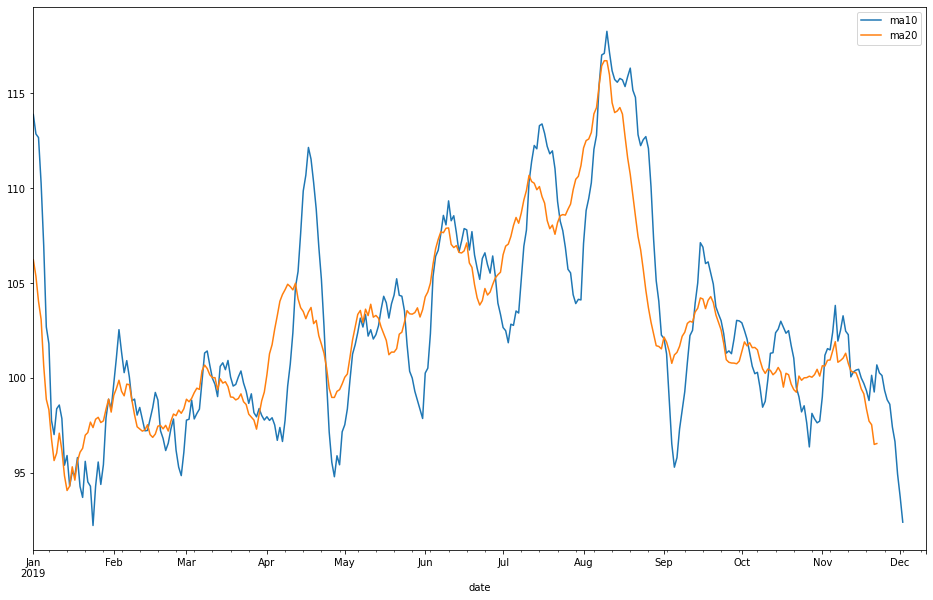

In [0]:
london_airbnb_2019_day.plot( y=["ma10",'ma20'], style='-',figsize=(16,10))
plt.show()


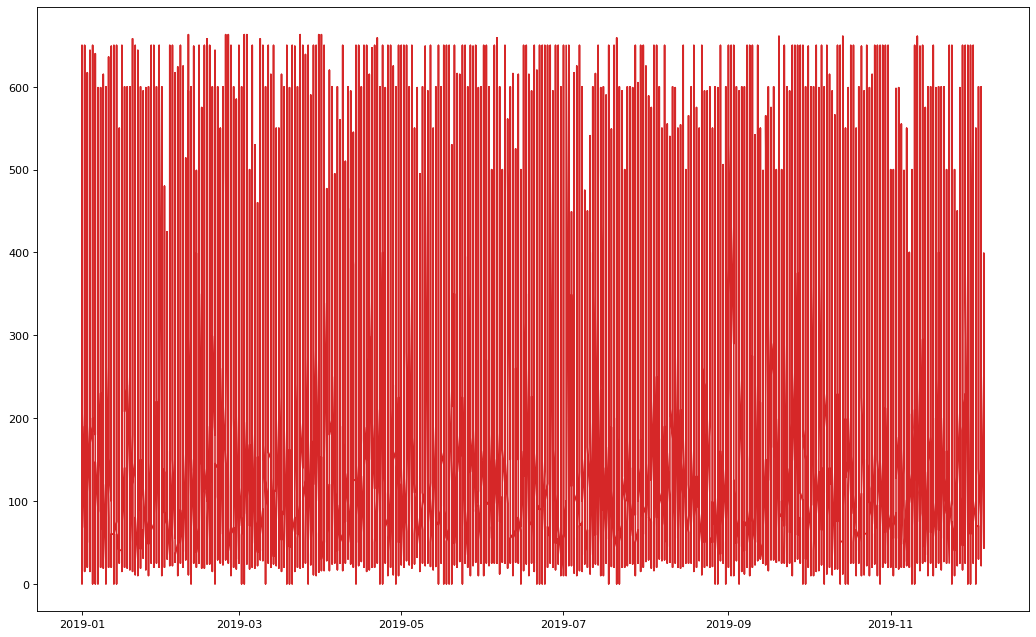

In [0]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('last_review', 'price_float', data=newyork_airbnb_2019, color='tab:red')

In [0]:
newyork_airbnb_2019_day['ma10'] = newyork_airbnb_2019_day['price_float'].rolling(10).mean().shift(-9)
newyork_airbnb_2019_day['ma20'] = newyork_airbnb_2019_day['price_float'].rolling(20).mean().shift(-19)

In [0]:
newyork_airbnb_2019_day['ma10'].to_csv("ma10_Newyork.csv")
newyork_airbnb_2019_day['ma20'].to_csv("ma20_Newyork.csv")

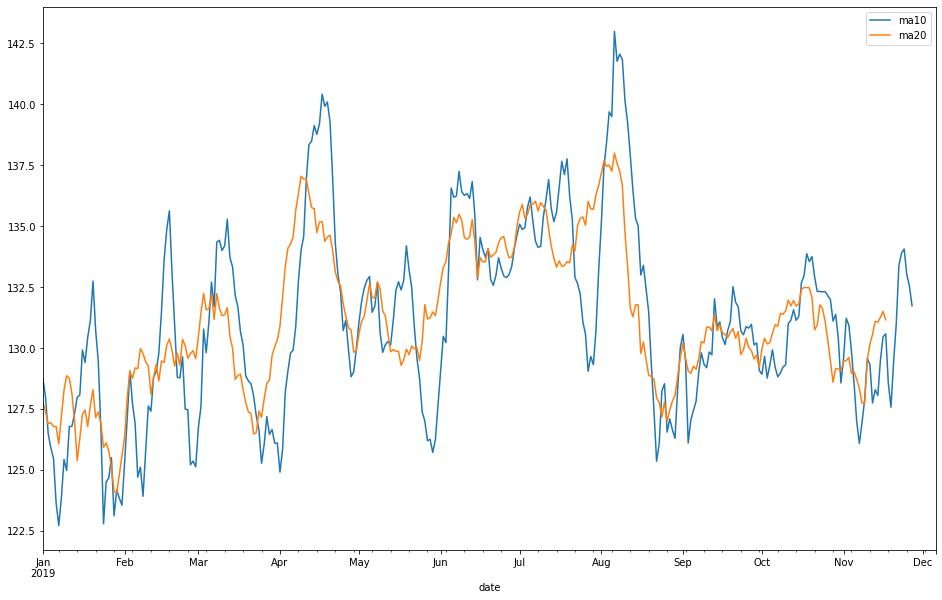

In [0]:
newyork_airbnb_2019_day.plot( y=["ma10",'ma20'], style='-',figsize=(16,10))
plt.show()

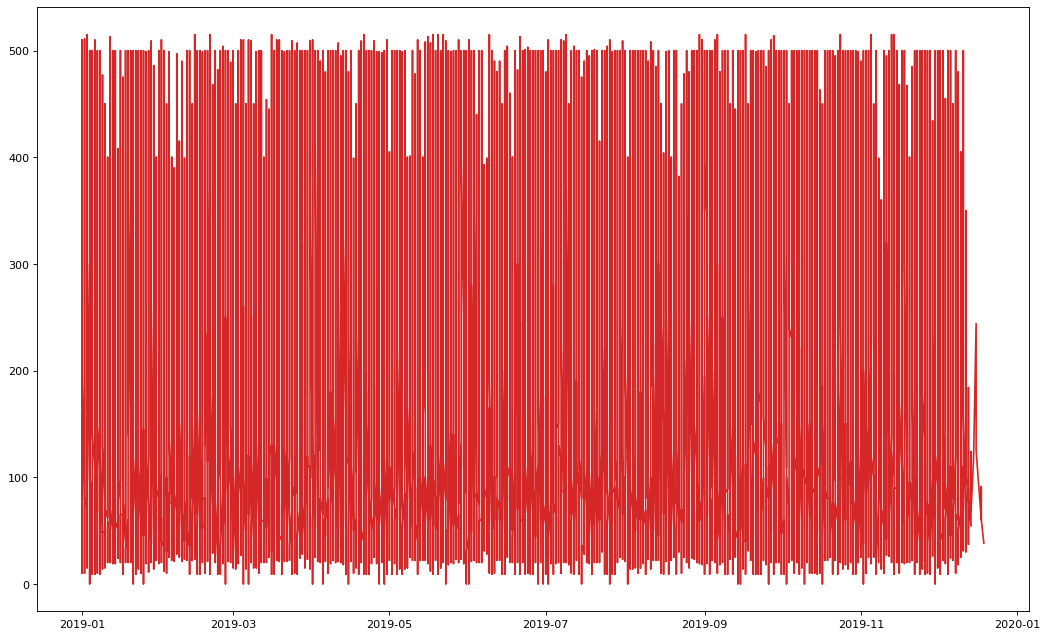

In [0]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('last_review', 'price_float', data=paris_airbnb_2019, color='tab:red')

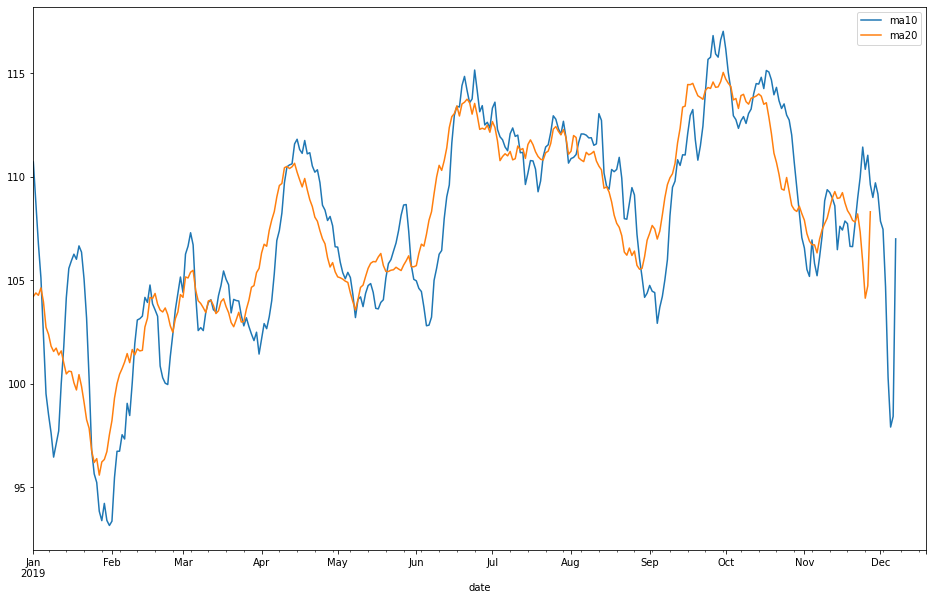

In [0]:
paris_airbnb_2019_day['ma10'] = paris_airbnb_2019_day['price_float'].rolling(10).mean().shift(-9)
paris_airbnb_2019_day['ma20'] = paris_airbnb_2019_day['price_float'].rolling(20).mean().shift(-19)
paris_airbnb_2019_day.plot( y=["ma10",'ma20'], style='-',figsize=(16,10))
plt.show()

In [0]:
paris_airbnb_2019_day['ma10'].to_csv("ma10_Paris.csv")
paris_airbnb_2019_day['ma20'].to_csv("ma20_Paris.csv")

# Hexgon

set environment 

In [0]:
%%sh
pip3 freeze | grep -E 'ipython|jupyter'

ipython==5.5.0
ipython-genutils==0.2.0
ipython-sql==0.3.9
jupyter==1.0.0
jupyter-client==5.3.4
jupyter-console==5.2.0
jupyter-core==4.6.3


In [0]:
%%sh
cat <<EOF > requirements_demo.txt
h3==3.1.0
pandas>=0.23
geojson==2.4.1
folium==0.2.1
seaborn==0.9.0
area==1.1.1
statsmodels==0.9.0
EOF

In [0]:
%%sh
pip3 install -U --quiet -r requirements_demo.txt

In [0]:
%%sh
pip3 freeze | grep -E 'h3|pandas|geojson|folium|seaborn|area|statsmodels'


area==1.1.1
folium==0.2.1
geojson==2.4.1
h3==3.1.0
pandas==1.0.3
pandas-datareader==0.8.1
pandas-gbq==0.11.0
pandas-profiling==1.4.1
seaborn==0.9.0
sklearn-pandas==1.8.0
statsmodels==0.9.0


In [0]:
%%sh
pwd
mkdir datasets_demo

/content


mkdir: cannot create directory ‘datasets_demo’: File exists


In [0]:
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
from h3 import h3


In [0]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

import statistics

from geojson.feature import *
from area import area

import copy

In [0]:
from folium import Map, Marker, GeoJson
from folium.plugins import MarkerCluster
import branca.colormap as cm
from branca.colormap import linear
import folium

import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from IPython.display import Image, display
from IPython.utils.text import columnize
import warnings
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline


In [0]:
max_res = 15
list_hex_edge_km = []
list_hex_edge_m = []
list_hex_perimeter_km = []
list_hex_perimeter_m = []
list_hex_area_sqkm = []
list_hex_area_sqm = []

for i in range(0,max_res + 1):
    ekm = h3.edge_length(resolution=i, unit='km')
    em = h3.edge_length(resolution=i, unit='m')
    list_hex_edge_km.append(round(ekm,3))
    list_hex_edge_m.append(round(em,3))
    list_hex_perimeter_km.append(round(6 * ekm,3))
    list_hex_perimeter_m.append(round(6 * em,3))
    
    akm = h3.hex_area(resolution=i, unit='km^2')
    am = h3.hex_area(resolution=i, unit='m^2')
    list_hex_area_sqkm.append(round(akm,3))
    list_hex_area_sqm.append(round(am,3))

df_meta = pd.DataFrame({"edge_length_km" : list_hex_edge_km,
                        "perimeter_km" : list_hex_perimeter_km,
                        "area_sqkm": list_hex_area_sqkm,
                        "edge_length_m" : list_hex_edge_m,
                        "perimeter_m" : list_hex_perimeter_m,
                        "area_sqm" : list_hex_area_sqm
                       })
                      
df_meta[["edge_length_km","perimeter_km","area_sqkm", "edge_length_m", "perimeter_m" ,"area_sqm"]]

,edge_length_km,perimeter_km,area_sqkm,edge_length_m,perimeter_m,area_sqm
0,1107.713,6646.276,4250546.848,1107712.591,6646275.546,4.250550e+12
1,418.676,2512.056,607220.978,418676.006,2512056.033,6.072210e+11
2,158.245,949.468,86745.854,158244.656,949467.935,8.674585e+10
3,59.811,358.865,12392.265,59810.858,358865.148,1.239226e+10
4,22.606,135.638,1770.324,22606.379,135638.276,1.770324e+09
5,8.544,51.266,252.903,8544.408,51266.450,2.529034e+08
6,3.229,19.377,36.129,3229.483,19376.897,3.612905e+07
7,1.221,7.324,5.161,1220.630,7323.779,5.161293e+06
8,0.461,2.768,0.737,461.355,2768.128,7.373276e+05
9,0.174,1.046,0.105,174.376,1046.254,1.053325e+05


In [0]:
lat_centr_point = 51
lon_centr_point = 0
list_hex_res = []
list_hex_res_geom = []
list_res = range(0,max_res+1)

for resolution in range(0,max_res + 1):
    #index the point in the H3 hexagon of given index resolution
    h = h3.geo_to_h3(lat=lat_centr_point,lng=lon_centr_point, res=resolution)
    list_hex_res.append(h)
    #get the geometry of the hexagon and convert to geojson
    h_geom = { "type" : "Polygon",
               "coordinates": 
                    [h3.h3_to_geo_boundary(h3_address=h,geo_json=True)]
              }
    list_hex_res_geom.append(h_geom)

    
df_resolution_example = pd.DataFrame({"res" : list_res,
                                      "hex_id" : list_hex_res,
                                      "geometry": list_hex_res_geom 
                                     })
df_resolution_example["hex_id_binary"] = df_resolution_example["hex_id"].apply(lambda x: bin(int(x,16))[2:])

pd.set_option('display.max_colwidth',63)
df_resolution_example

,res,hex_id,geometry,hex_id_binary
0,0,8019fffffffffff,"{'type': 'Polygon', 'coordinates': [[[-10.444977544778283, ...",100000000001100111111111111111111111111111111111111111111111
1,1,81197ffffffffff,"{'type': 'Polygon', 'coordinates': [[[-0.931587163510585, 5...",100000010001100101111111111111111111111111111111111111111111
2,2,82194ffffffffff,"{'type': 'Polygon', 'coordinates': [[[2.1013139839474526, 5...",100000100001100101001111111111111111111111111111111111111111
3,3,83194afffffffff,"{'type': 'Polygon', 'coordinates': [[[-0.06929409787983332,...",100000110001100101001010111111111111111111111111111111111111
4,4,84194a1ffffffff,"{'type': 'Polygon', 'coordinates': [[[0.13752763792479353, ...",100001000001100101001010000111111111111111111111111111111111
5,5,85194a03fffffff,"{'type': 'Polygon', 'coordinates': [[[0.05651248589037318, ...",100001010001100101001010000000111111111111111111111111111111
6,6,86194a18fffffff,"{'type': 'Polygon', 'coordinates': [[[-0.027997724907379506...",100001100001100101001010000110001111111111111111111111111111
7,7,87194a032ffffff,"{'type': 'Polygon', 'coordinates': [[[0.01296610234694848, ...",100001110001100101001010000000110010111111111111111111111111
8,8,88194a0325fffff,"{'type': 'Polygon', 'coordinates': [[[0.005098648441974571,...",100010000001100101001010000000110010010111111111111111111111
9,9,89194a0325bffff,"{'type': 'Polygon', 'coordinates': [[[0.0005269672786384058...",100010010001100101001010000000110010010110111111111111111111


In [0]:
def counts_by_hexagon(df, resolution):
    
    '''Use h3.geo_to_h3 to index each data point into the spatial index of the specified resolution.
      Use h3.h3_to_geo_boundary to obtain the geometries of these hexagons'''

    df = df[["latitude","longitude"]]
    
    df["hex_id"] = df.apply(lambda row: h3.geo_to_h3(row["latitude"], row["longitude"], resolution), axis = 1)
    df_aggreg = df.groupby(by = "hex_id").size().reset_index()
    df_aggreg.columns = ["hex_id", "value"]
    
    df_aggreg["geometry"] =  df_aggreg.hex_id.apply(lambda x: 
                                                           {    "type" : "Polygon",
                                                                 "coordinates": 
                                                                [h3.h3_to_geo_boundary(h3_address=x,geo_json=True)]
                                                            }
                                                        )    
    return df_aggreg

In [0]:
london_airbnb_2019.last_review = london_airbnb_2019.last_review.astype(str)

london_airbnb_2019['year_review'] = [d.split('-')[0] for d in london_airbnb_2019.last_review]
london_airbnb_2019['month_review'] = [d.split('-')[1] for d in london_airbnb_2019.last_review]
london_airbnb_2019['day_review'] = [d.split('-')[2] for d in london_airbnb_2019.last_review]

london_airbnb_2019.month_review = london_airbnb_2019.month_review.astype(int)
london_airbnb_2019['month_review'].value_counts()

7     52807
6     43211
8     42060
4     42045
10    39324
9     37128
5     36178
3     34949
1     28291
2     25735
11    19512
12     8517
Name: month_review, dtype: int64

In [0]:
# Group the dataframe by the month_scraped column, then create new dataframes and put them in a list
df = [x for _, x in london_airbnb_2019.groupby('month_review')]

In [0]:
df[1].head()

,Unnamed: 0,id,host_id,last_scraped,zipcode,latitude,longitude,neighbourhood,property_type,room_type,price,number_of_reviews,last_review,year_scraped,month_scraped,day_scraped,price_float,year_review,month_review,day_review
date,,,,,,,,,,,,,,,,,,,,
2019-02-01,257771,30816536,221120553,2019-04-11,WC2E 7NU,51.51357,-0.12041,Covent Garden,Apartment,Entire home/apt,150.00,1.0,2019-02-01,2019,4,11,150.0,2019,2,01
2019-02-01,375739,17493028,15362402,2019-03-08,UB6 7PE,51.53799,-0.32782,LB of Ealing,Apartment,Private room,40.00,21.0,2019-02-01,2019,3,8,40.0,2019,2,01
2019-02-01,299696,1858034,3145564,2019-04-11,E14,51.50128,-0.01837,Isle of Dogs,Serviced apartment,Private room,79.00,25.0,2019-02-01,2019,4,11,79.0,2019,2,01
2019-02-01,321228,24182842,182268866,2019-04-11,CR7 7HD,51.39063,-0.10888,LB of Croydon,House,Private room,30.00,14.0,2019-02-01,2019,4,11,30.0,2019,2,01
2019-02-01,370589,7855313,8507380,2019-03-08,NW1,51.52128,-0.16958,City of Westminster,Apartment,Entire home/apt,148.00,47.0,2019-02-01,2019,3,8,148.0,2019,2,01


In [0]:
# Apply the counts_by_hexagon function to each dataframe in the list and append to a new list

all_hex = []

for i in df:
  print(i)
  all_hex.append(counts_by_hexagon(df = i, resolution = 15))

            Unnamed: 0        id  ...  month_review day_review
date                              ...                         
2019-01-01      325674  29803026  ...             1         01
2019-01-01      372232     89870  ...             1         01
2019-01-01      357945  29302855  ...             1         01
2019-01-01      309301  29935298  ...             1         01
2019-01-01      325493  29594069  ...             1         01
...                ...       ...  ...           ...        ...
2019-01-31      379197  16724257  ...             1         31
2019-01-31       16102  11115470  ...             1         31
2019-01-31     1641302  19708293  ...             1         31
2019-01-31       28527  17870535  ...             1         31
2019-01-31      195905   1016555  ...             1         31

[28291 rows x 20 columns]
            Unnamed: 0        id  ...  month_review day_review
date                              ...                         
2019-02-01      257771  3081

In [0]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None):
    
    '''Produce the GeoJSON for a dataframe that has a geometry column in geojson format already, along with the columns hex_id and value '''
    
    list_features = []
    
    for i,row in df_hex.iterrows():
        feature = Feature(geometry = row["geometry"] , id=row["hex_id"], properties = {"value" : row["value"]})
        list_features.append(feature)
        
    feat_collection = FeatureCollection(list_features)
    
    geojson_result = json.dumps(feat_collection)
    
    #optionally write to file
    if file_output is not None:
        with open(file_output,"w") as f:
            json.dump(feat_collection,f)
    
    return geojson_result

In [0]:
df2 = all_hex[2]
df9 = all_hex[9]



In [0]:
Feb = hexagons_dataframe_to_geojson(df_hex = df2, file_output="Feb_London15_new.geojson")
Sep = hexagons_dataframe_to_geojson(df_hex = df9, file_output="Sep_London15_new.geojson")